# Phillies Assesment
### By: Kyle Chmielewski
### Date: August 29, 2022

# Objective

Given the dataset containing 28 fields pertaining to specific player's stats during the months of March and April in 2019, this project is to estimate their full season on base percentages, with reasonable accuracy. 

# Understanding the Data

This dataset was downloaded from https://www.fangraphs.com, which is a publically available data source.

###Data Field Definitions
1. Playerid - player’s Fangraphs ID
2. Name - player’s name
3. Team - player’s team
4. MarApr_PA - player’s plate appearances in March and April 2019
5. MarApr_AB - player’s at bats in March and April 2019
6. MarApr_H - player’s hits in March and April 2019
7. MarApr_HR - player’s home runs in March and April 2019
8. MarApr_R - player’s runs scored in March and April 2019
9. MarApr_RBI - player’s RBI in March and April 2019
10. MarApr_SB - player’s stolen bases in March and April 2019
11. MarApr_BB% - player’s walk percentage in March and April 2019
12. MarApr_K% - player’s strikeout percentage in March and April 2019
13. MarApr_ISO - player’s isolated power in March and April 2019
14. MarApr_BABIP - player’s BABIP in March and April 2019
15. MarApr_AVG - player’s batting average in March and April 2019
16. MarApr_OBP - player’s on-base percentage in March and April 2019
17. MarApr_SLG - player’s slugging percentage in March and April 2019
18. MarApr_LD% - player’s line drive percentage in March and April 2019
19. MarApr_GB% - player’s ground ball percentage in March and April 2019
20. MarApr_FB% - player’s fly ball percentage in March and April 2019
21. MarApr_IFFB% - player’s infield fly ball percentage in March and April 2019
22. MarApr_HR/FB - player’s home run per fly ball rate in March and April 2019
23. MarApr_O-Swing% - player’s out-of-zone swing-per-pitch percentage in March and April 2019
25. MarApr_Z-Swing% - player’s in-zone swing-per-pitch percentage in March and April 2019
26. MarApr_Swing% - player’s total swing-per-pitch percentage in March and April 2019
27. MarApr_O-Contact% - player’s out-of-zone contact-per-swing percentage and April 2019
28. MarApr_Z-Contact% - player’s in-zone contact-per-swing percentage in March and April 2019
29. MarApr_Contact% - player’s total contact-per-swing percentage in March and April 2019
30. FullSeason_OBP - player’s on-base percentage for his entire 2019 season




# Exploratory Data Analysis

In [31]:
#Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
#reading in csv
my_data = pd.read_csv("batting.csv")
my_data

,playerid,Name,Team,MarApr_PA,MarApr_AB,MarApr_H,MarApr_HR,MarApr_R,MarApr_RBI,MarApr_SB,...,MarApr_FB%,MarApr_IFFB%,MarApr_HR/FB,MarApr_O-Swing%,MarApr_Z-Swing%,MarApr_Swing%,MarApr_O-Contact%,MarApr_Z-Contact%,MarApr_Contact%,FullSeason_OBP
0,15998,Cody Bellinger,LAD,132,109,47,14,32,37,5,...,36.1%,5.7%,40.0%,22.6%,66.0%,40.7%,81.1%,88.4%,86.0%,0.406
1,11477,Christian Yelich,MIL,124,102,36,14,26,34,6,...,41.0%,11.8%,41.2%,27.9%,72.4%,44.8%,56.6%,87.8%,75.7%,0.429
2,17975,Scott Kingery,PHI,35,32,13,2,5,6,1,...,33.3%,0.0%,22.2%,40.2%,74.5%,53.5%,54.3%,85.4%,71.1%,0.315
3,7927,Eric Sogard,TOR,49,43,17,3,8,9,2,...,40.5%,0.0%,20.0%,27.3%,50.5%,37.3%,93.9%,97.8%,96.2%,0.353
4,14130,Daniel Vogelbach,SEA,92,71,22,8,15,16,0,...,51.9%,7.4%,29.6%,23.7%,48.8%,33.7%,66.1%,82.7%,75.7%,0.341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,12984,Jackie Bradley Jr.,BOS,99,88,13,0,5,5,3,...,32.2%,15.8%,0.0%,29.8%,70.6%,47.7%,48.5%,76.0%,66.3%,0.317
316,9253,Keon Broxton,NYM,45,41,6,0,4,2,4,...,36.4%,0.0%,0.0%,26.1%,64.2%,41.8%,36.7%,65.4%,54.9%,0.242
317,16357,Pablo Reyes,PIT,39,36,5,0,5,3,0,...,47.6%,10.0%,0.0%,27.3%,53.8%,38.6%,45.8%,85.7%,69.5%,0.274
318,6848,Eduardo Nunez,BOS,46,44,7,0,3,5,3,...,38.9%,21.4%,0.0%,30.7%,69.6%,50.6%,69.6%,90.9%,84.6%,0.243


In [33]:
#Make all percent values a decimal
my_data['MarApr_BB%'] = my_data['MarApr_BB%'].str.rstrip("%").astype(float)/100
my_data['MarApr_K%'] = my_data['MarApr_K%'].str.rstrip("%").astype(float)/100
my_data['MarApr_LD%'] = my_data['MarApr_LD%'].str.rstrip("%").astype(float)/100
my_data['MarApr_GB%'] = my_data['MarApr_GB%'].str.rstrip("%").astype(float)/100
my_data['MarApr_FB%'] = my_data['MarApr_FB%'].str.rstrip("%").astype(float)/100
my_data['MarApr_IFFB%'] = my_data['MarApr_IFFB%'].str.rstrip("%").astype(float)/100
my_data["MarApr_HR/FB"] = my_data['MarApr_HR/FB'].str.rstrip("%").astype(float)/100
my_data['MarApr_O-Swing%'] = my_data['MarApr_O-Swing%'].str.rstrip("%").astype(float)/100
my_data['MarApr_Z-Swing%'] = my_data['MarApr_Z-Swing%'].str.rstrip("%").astype(float)/100
my_data['MarApr_Swing%'] = my_data['MarApr_Swing%'].str.rstrip("%").astype(float)/100
my_data['MarApr_O-Contact%'] = my_data['MarApr_O-Contact%'].str.rstrip("%").astype(float)/100
my_data['MarApr_Z-Contact%'] = my_data['MarApr_Z-Contact%'].str.rstrip("%").astype(float)/100
my_data['MarApr_Contact%'] = my_data['MarApr_Contact%'].str.rstrip("%").astype(float)/100

In [34]:
my_data

,playerid,Name,Team,MarApr_PA,MarApr_AB,MarApr_H,MarApr_HR,MarApr_R,MarApr_RBI,MarApr_SB,...,MarApr_FB%,MarApr_IFFB%,MarApr_HR/FB,MarApr_O-Swing%,MarApr_Z-Swing%,MarApr_Swing%,MarApr_O-Contact%,MarApr_Z-Contact%,MarApr_Contact%,FullSeason_OBP
0,15998,Cody Bellinger,LAD,132,109,47,14,32,37,5,...,0.361,0.057,0.400,0.226,0.660,0.407,0.811,0.884,0.860,0.406
1,11477,Christian Yelich,MIL,124,102,36,14,26,34,6,...,0.410,0.118,0.412,0.279,0.724,0.448,0.566,0.878,0.757,0.429
2,17975,Scott Kingery,PHI,35,32,13,2,5,6,1,...,0.333,0.000,0.222,0.402,0.745,0.535,0.543,0.854,0.711,0.315
3,7927,Eric Sogard,TOR,49,43,17,3,8,9,2,...,0.405,0.000,0.200,0.273,0.505,0.373,0.939,0.978,0.962,0.353
4,14130,Daniel Vogelbach,SEA,92,71,22,8,15,16,0,...,0.519,0.074,0.296,0.237,0.488,0.337,0.661,0.827,0.757,0.341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,12984,Jackie Bradley Jr.,BOS,99,88,13,0,5,5,3,...,0.322,0.158,0.000,0.298,0.706,0.477,0.485,0.760,0.663,0.317
316,9253,Keon Broxton,NYM,45,41,6,0,4,2,4,...,0.364,0.000,0.000,0.261,0.642,0.418,0.367,0.654,0.549,0.242
317,16357,Pablo Reyes,PIT,39,36,5,0,5,3,0,...,0.476,0.100,0.000,0.273,0.538,0.386,0.458,0.857,0.695,0.274
318,6848,Eduardo Nunez,BOS,46,44,7,0,3,5,3,...,0.389,0.214,0.000,0.307,0.696,0.506,0.696,0.909,0.846,0.243


## Scatter Plot of the Full Season OBP vs Triple Slash Statistics

First I want to see how much the three most basic metrics contribute to a players full season OBP.


Text(0, 0.5, 'Full Season OBP')

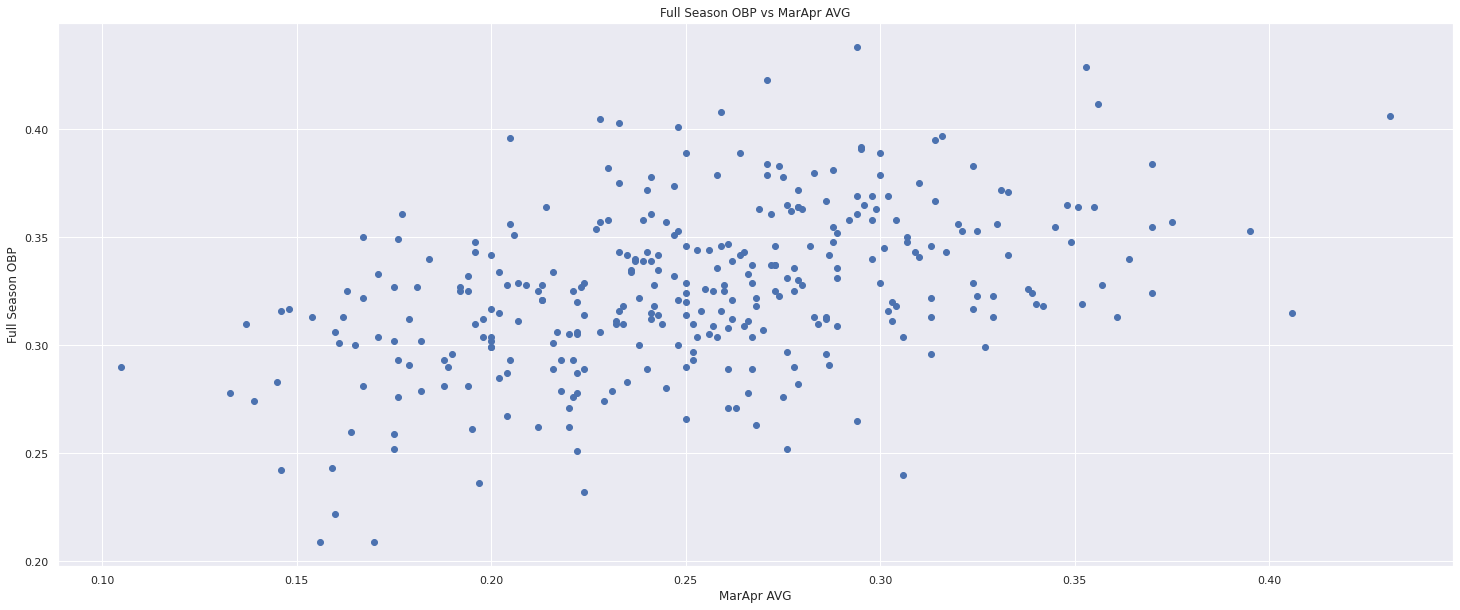

In [35]:
#Scatter Plots of Full Season OBP in relation to March and April Batting AVG

plt.scatter(my_data["MarApr_AVG"],my_data["FullSeason_OBP"])
plt.title('Full Season OBP vs MarApr AVG')
plt.xlabel('MarApr AVG')
plt.ylabel('Full Season OBP')

Text(0, 0.5, 'Full Season OBP')

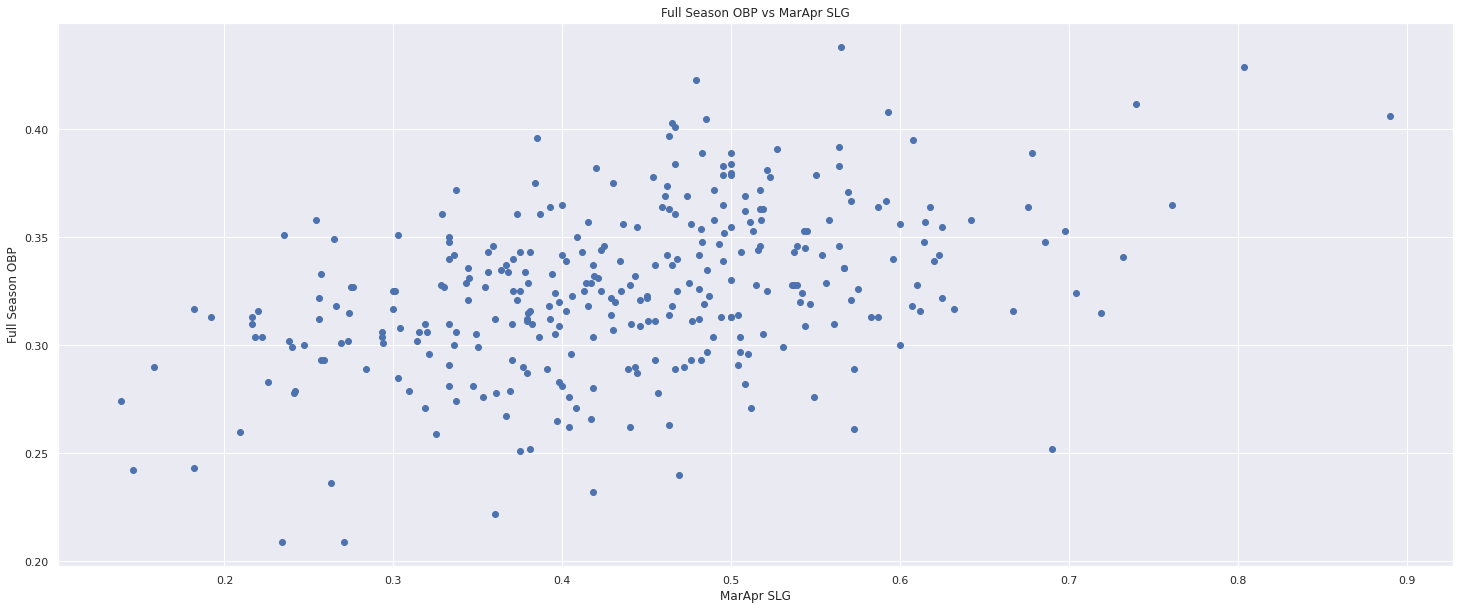

In [36]:
#Scatter Plots of Full Season OBP in relation to March and April Batting SLG

plt.scatter(my_data["MarApr_SLG"],my_data["FullSeason_OBP"])
plt.title('Full Season OBP vs MarApr SLG')
plt.xlabel('MarApr SLG')
plt.ylabel('Full Season OBP')

Text(0, 0.5, 'Full Season OBP')

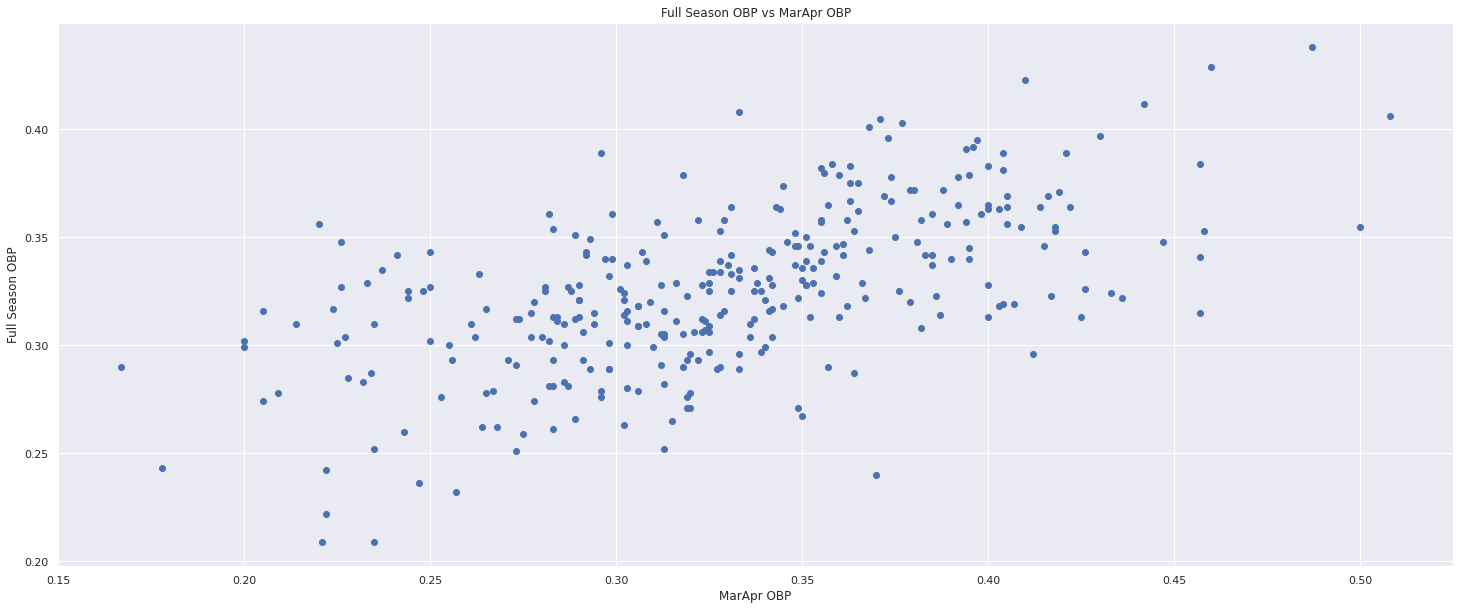

In [37]:
#Scatter Plots of Full Season OBP in relation to March and April Batting OBP

plt.scatter(my_data["MarApr_OBP"],my_data["FullSeason_OBP"])
plt.title('Full Season OBP vs MarApr OBP')
plt.xlabel('MarApr OBP')
plt.ylabel('Full Season OBP')

The three scatter plots reveal very similar relationships, with no surprise the March and April OBP scatterplot having the tightest distribution and most linear relationship.


## Heatmap of Correlation



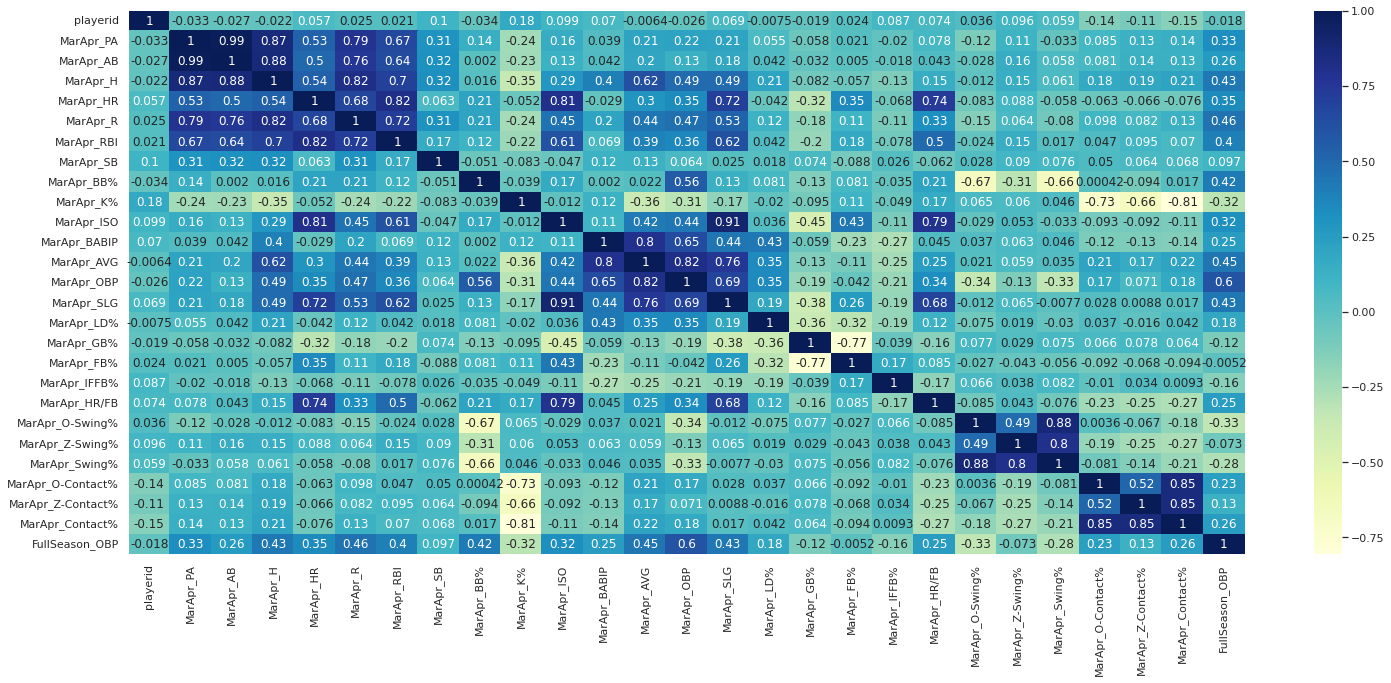

In [38]:
#Heatmap of correlation
sns.set(rc = {'figure.figsize':(25,10)})
sns.heatmap(my_data.corr(), cmap="YlGnBu", annot = True)

Our Heat Map illustrates the metrics which are the most correlated with a player's full season OBP.

In this case, MarAPR_OBP is the highest correlated metric meaning it has the strongest relationship with full season OBP. This case is not surprising as guys who are high OBP guys likey don't have huge two month slumps from getting on base.


# Machine Learning Model and Evaulation

## Variable Selection

To decide the variables I put in the model, I chose the five features with correlation scores over 0.25, where the metrics were not redudndant. Redundant meaning one metric includes the other, such as how OBP includes H, BB, HBP. Also excluded statistic that don't have anything to with getting on base such as: Runs, RBIs, etc.

Using this selection criteria I chose the following features: MarApr_OBP, MarApr_BB%, MarApr_SLG, MarApr_HR, MarApr_HR/FB. 

## Spliting into Training and Test Set


In [39]:
x = my_data[['MarApr_OBP', 'MarApr_BB%', 'MarApr_SLG','MarApr_HR', 'MarApr_HR/FB']]
y = my_data['FullSeason_OBP']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

## Running the Model

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
MarApr_OBP,0.342369
MarApr_BB%,0.053874
MarApr_SLG,-0.015200
MarApr_HR,0.003758
MarApr_HR/FB,-0.056354


## Predicting OBP using the Model


Text(0, 0.5, 'Predicted OBP')

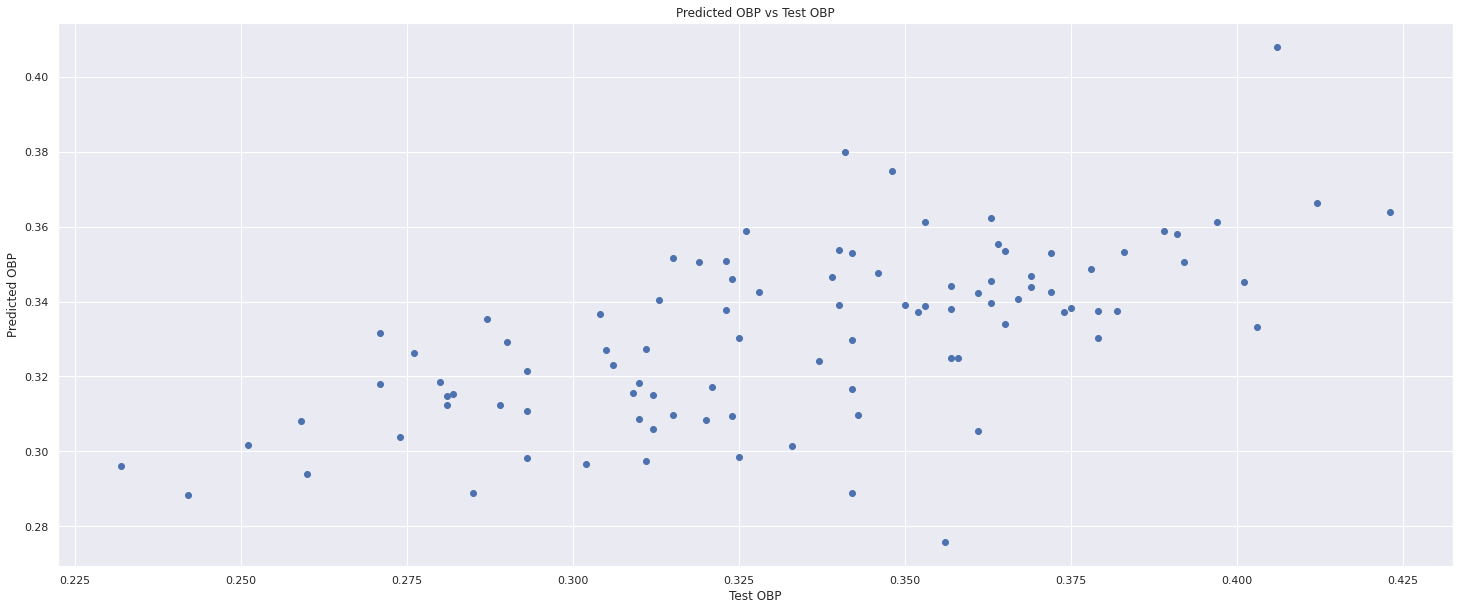

In [41]:
predictions = model.predict(x_test)
plt.scatter(y_test, predictions)
plt.title('Predicted OBP vs Test OBP')
plt.xlabel('Test OBP')
plt.ylabel('Predicted OBP')

## Testing the Accuracy of the Model

MAE: 
0.02672727665907837
MSE: 
0.0010131123683137933
RMSE: 
0.03182942613861886


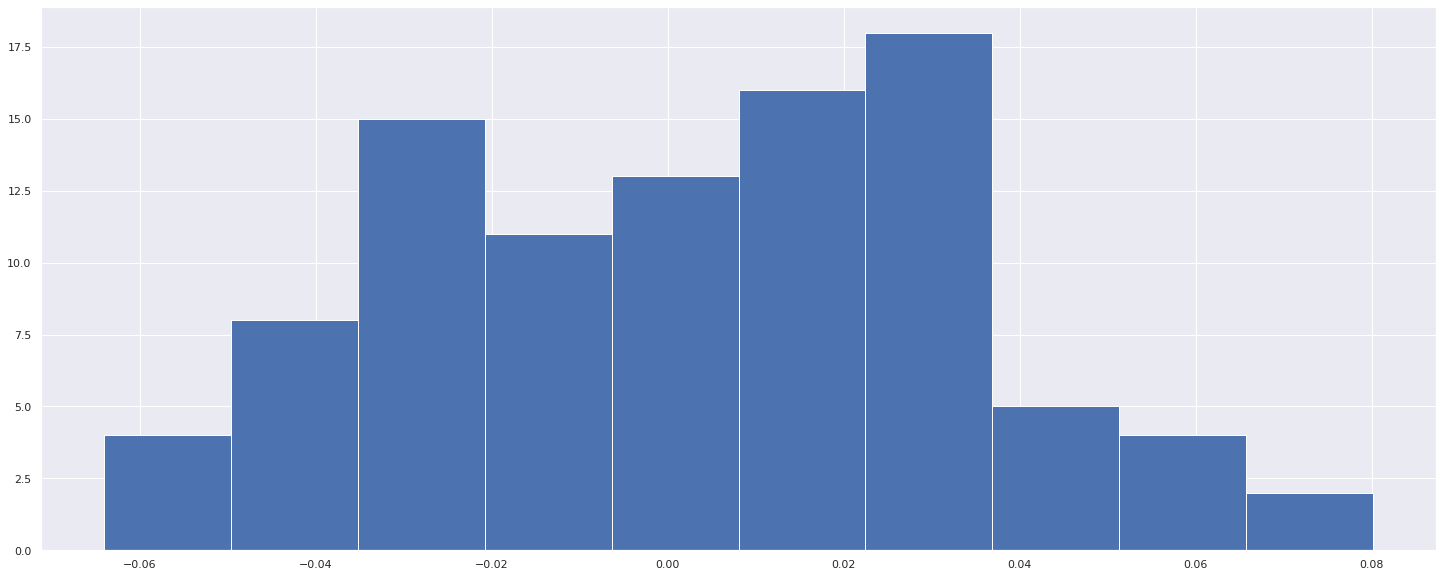

In [42]:
#Checking for normally distributed residuals
plt.hist(y_test - predictions)

from sklearn import metrics

print("MAE: ")
print(metrics.mean_absolute_error(y_test, predictions))

print("MSE: ")
print(metrics.mean_squared_error(y_test, predictions))

print("RMSE: ")
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

# Conclusion

After running this model, there are multiple valuable takeaways the ballclub can utilize in player evaluation. First off, when looking at the accuracy of our model we can see our model is pretty close to totally accurate, as our Mean Average Error is only 0.022, which means on average our prediction is 0.022 away from the true value. Similarly, our MSE and RMSE are also very low. In terms of evaluating the residual plot, it is clear it isn't a perfect normal distrubtion but the shape is clear enough to merit the validity of this model. This means we can utilize this model to reasonably estimate the full season OBP of a player based on his performance in March and April.

This can be a very valuable tool for the club, as it is incredibly important to know how a player will regress or progress toward the mean. The club can greatly benefit from this idea, by using it to determine who stays in or leaves the lineup. Ultimately, estimating a players end of season stats can be very benefical as sometimes a hot or cold streak tends to bend managerial decicsions even when the math says to do the opposite.